## Boom Bike Prediction

### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Read Bike Data

In [2]:
bike_df = pd.read_csv('day.csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Numerical Data Description 

In [4]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike_df.shape

(730, 16)

In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Exploratory Data Analysis

#### Categorical variable Analysis

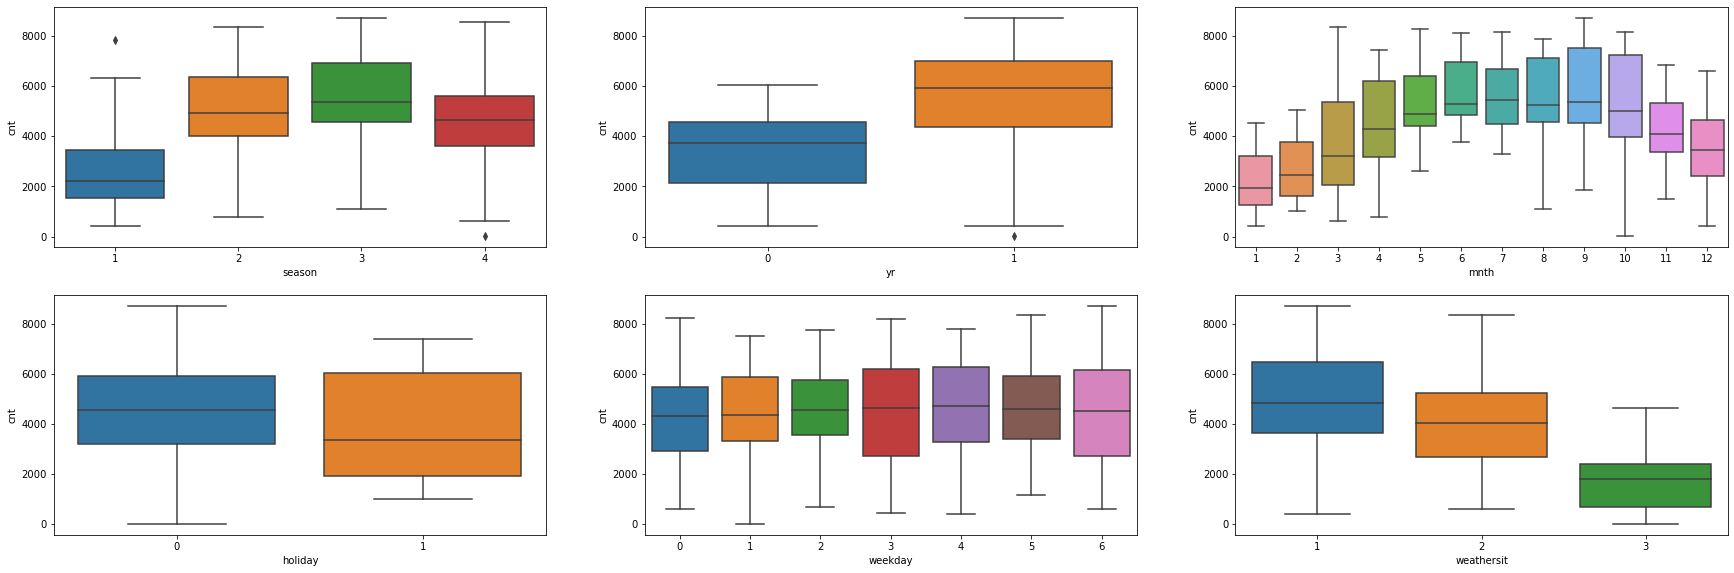

In [7]:
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike_df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bike_df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bike_df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bike_df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bike_df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bike_df)
plt.show()

#### Numerical variable analysis

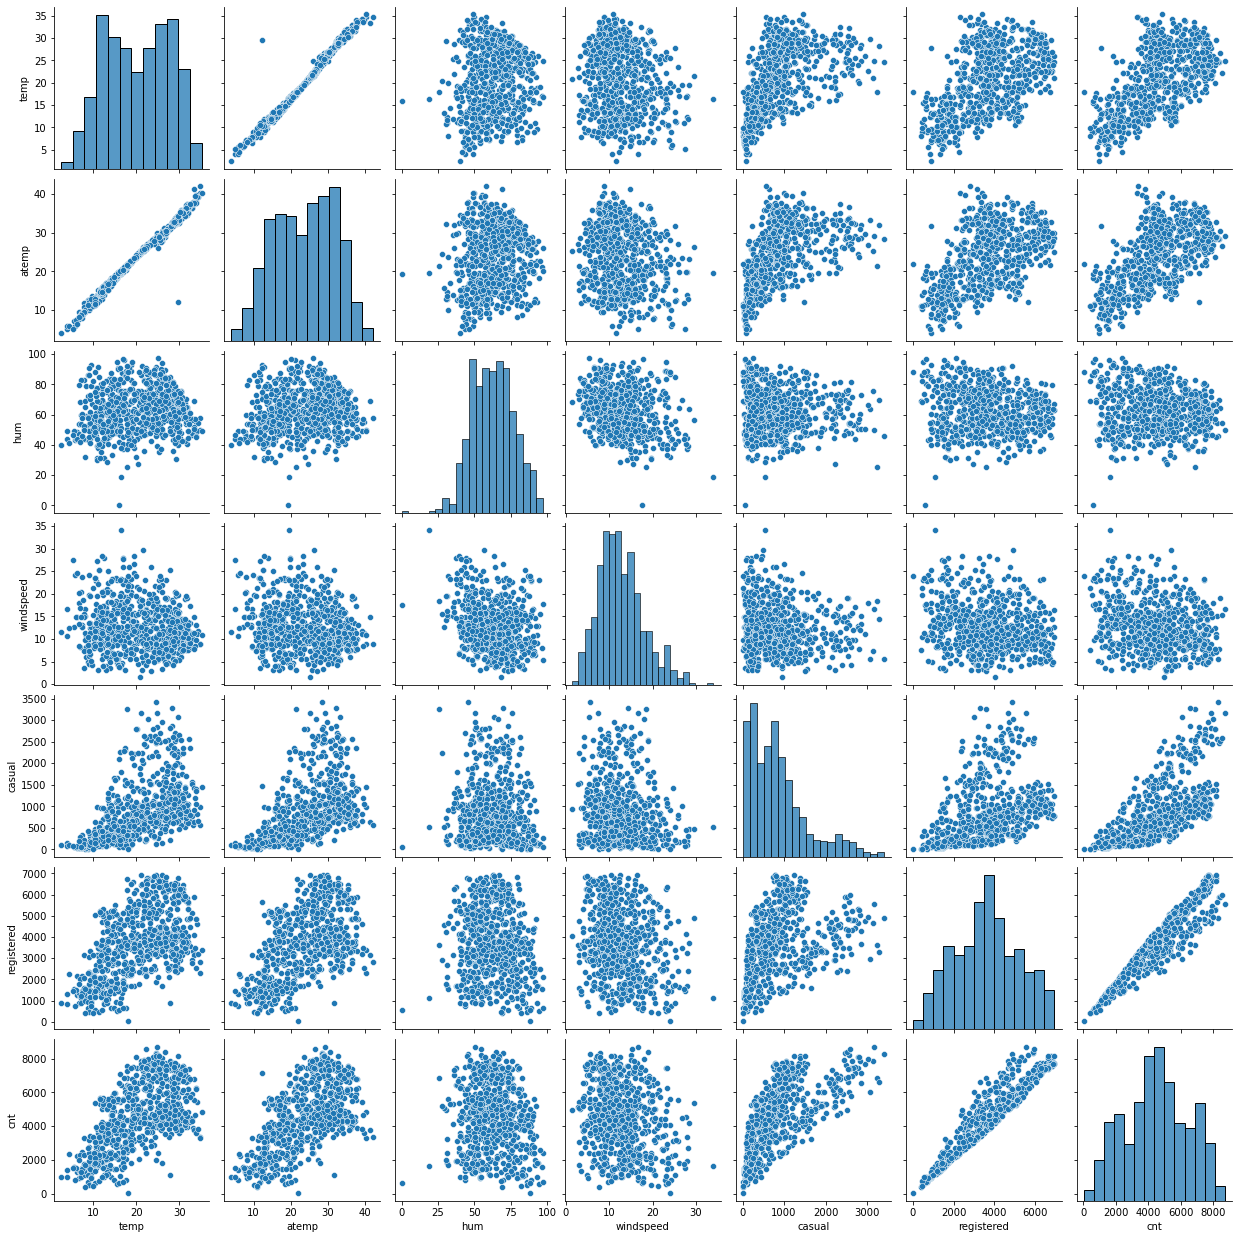

In [8]:
num_data=["temp","atemp","hum","windspeed","casual","registered", "cnt"]
sns.pairplot(bike_df[num_data])
plt.show()

##### Observations
* Registered is highly correlated with Cnt <br>
* temp and atemp are highly correlated <br>
* temp shows correlation with Cnt

In [9]:
# Drop 'instant' variable from the bike_df
bike_df.drop('instant', axis = 1 ,inplace = True)

#### Heatmpap to visualize corelations among the predictors

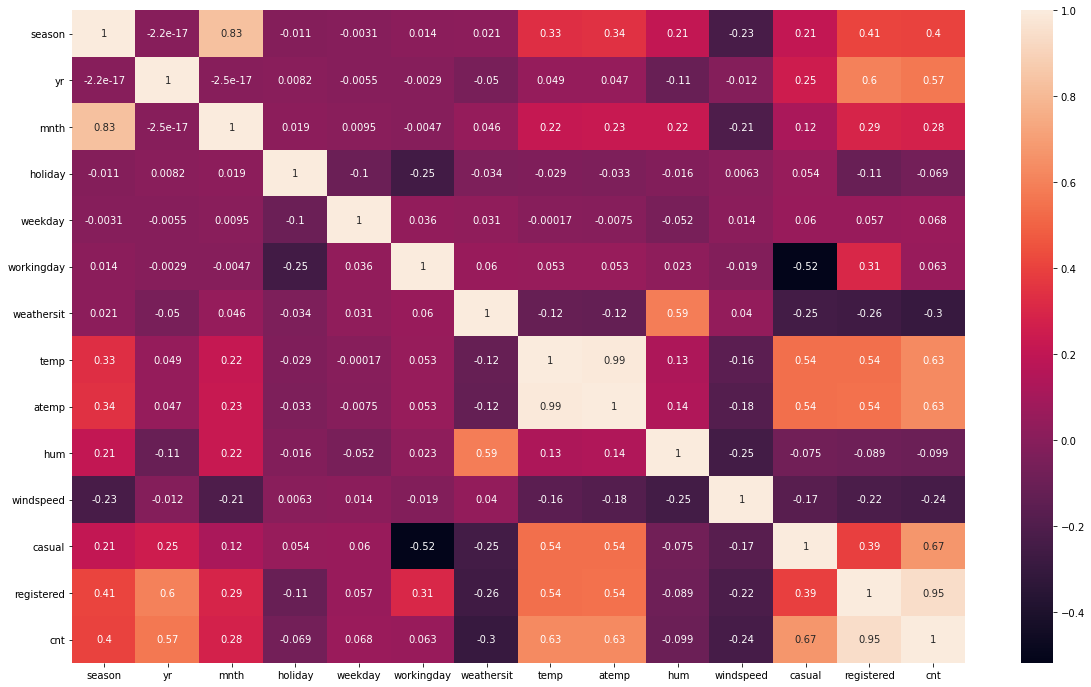

In [10]:
plt.figure(figsize=(20, 12))
sns.heatmap(bike_df.corr(),annot=True)
plt.show()

#### Mapping Seasons per Data Dictionary

In [11]:
bike_df.season=bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

#### One Hot Encoding Season

In [12]:
season=pd.get_dummies(bike_df.season, drop_first=True)
season.describe()

,spring,summer,winter
count,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836
std,0.431313,0.434490,0.429689
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [13]:
bike_df=pd.concat([bike_df,season], axis=1)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


#### Mapping Months

In [14]:
bike_df.mnth=bike_df.mnth.map({1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',
                     7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_df['mnth'].value_counts()

Aug    62
Jan    62
Dec    62
Mar    62
May    62
Jul    62
Oct    62
Apr    60
Sep    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

#### One Hot Encoding Months

In [18]:
mnth=pd.get_dummies(bike_df.mnth, drop_first=True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
bike_df=pd.concat([bike_df,mnth], axis=1)
bike_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,spring,1,Dec,0,4,1,2,10.420847,11.33210,...,1,0,0,0,0,0,0,0,0,0
726,28-12-2019,spring,1,Dec,0,5,1,2,10.386653,12.75230,...,1,0,0,0,0,0,0,0,0,0
727,29-12-2019,spring,1,Dec,0,6,0,2,10.386653,12.12000,...,1,0,0,0,0,0,0,0,0,0
728,30-12-2019,spring,1,Dec,0,0,0,1,10.489153,11.58500,...,1,0,0,0,0,0,0,0,0,0


#### Mapping Weather Situation

In [21]:
bike_df.weathersit=bike_df.weathersit.map({1:'clear', 2:'misty', 3:'cloudy'})
bike_df.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

#### One Hot Encoding Weather Situation

In [22]:
weathersit=pd.get_dummies(bike_df.weathersit, drop_first=True)

In [23]:
weathersit.describe()

,cloudy,misty
count,730.000000,730.000000
mean,0.028767,0.336986
std,0.167266,0.473004
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [24]:
bike_df=pd.concat([bike_df,weathersit], axis=1)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty
0,01-01-2018,spring,0,Jan,0,6,0,misty,14.110847,18.18125,...,1,0,0,0,0,0,0,0,0,1
1,02-01-2018,spring,0,Jan,0,0,0,misty,14.902598,17.68695,...,1,0,0,0,0,0,0,0,0,1
2,03-01-2018,spring,0,Jan,0,1,1,clear,8.050924,9.47025,...,1,0,0,0,0,0,0,0,0,0
3,04-01-2018,spring,0,Jan,0,2,1,clear,8.200000,10.60610,...,1,0,0,0,0,0,0,0,0,0
4,05-01-2018,spring,0,Jan,0,3,1,clear,9.305237,11.46350,...,1,0,0,0,0,0,0,0,0,0


#### Mapping Weekday

In [26]:
bike_df.weekday=bike_df.weekday.map(
    {0:'Mon', 1:'Tues', 2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
bike_df.weekday.value_counts()

Mon      105
Sun      105
Tues     105
Wed      104
Fri      104
Sat      104
Thurs    103
Name: weekday, dtype: int64

#### One Hot Encoding Weekday

In [27]:
weekday=pd.get_dummies(bike_df.weekday, drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


In [28]:
bike_df=pd.concat([bike_df,weekday], axis=1)
bike_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed
0,01-01-2018,spring,0,Jan,0,Sun,0,misty,14.110847,18.18125,...,0,0,0,1,0,0,1,0,0,0
1,02-01-2018,spring,0,Jan,0,Mon,0,misty,14.902598,17.68695,...,0,0,0,1,1,0,0,0,0,0
2,03-01-2018,spring,0,Jan,0,Tues,1,clear,8.050924,9.47025,...,0,0,0,0,0,0,0,0,1,0
3,04-01-2018,spring,0,Jan,0,Wed,1,clear,8.200000,10.60610,...,0,0,0,0,0,0,0,0,0,1
4,05-01-2018,spring,0,Jan,0,Thurs,1,clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [29]:
bike_df.drop(columns=['dteday','season','weathersit','mnth','weekday'], inplace=True)

In [30]:
bike_df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


In [34]:
pd.set_option('display.max_columns', None)

In [35]:
bike_df.head(5)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Bin by Registered 

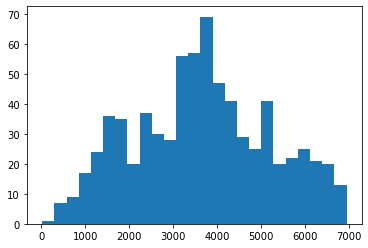

In [39]:
plt.hist(bike_df.registered,bins=25)
plt.show()

In [40]:
bike_df.registered.quantile([0.2, 0.4, 0.6, 0.8, 1])

0.2    2208.6
0.4    3310.2
0.6    3980.4
0.8    5116.4
1.0    6946.0
Name: registered, dtype: float64

In [41]:
bins=['very low','low','medium','high','very high']
bike_df['registered_bin']=pd.qcut(bike_df['registered'],q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=bins)

In [42]:
bike_df['registered_bin'].value_counts()

very high    146
high         146
medium       146
low          146
very low     146
Name: registered_bin, dtype: int64

#### One Hote Encoding Registered Bin

In [43]:
registered_bin=pd.get_dummies(bike_df.registered_bin, drop_first=True)

In [44]:
registered_bin.head()

,low,medium,high,very high
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [45]:
bike_df=pd.concat([bike_df,registered_bin], axis=1)
bike_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed,registered_bin,low,medium,high,very high
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,very low,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,very low,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,very low,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,very low,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,very low,0,0,0,0


In [47]:
bike_df.drop(['atemp', 'casual','registered','registered_bin'],axis = 1,inplace = True)
bike_df.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed,low,medium,high,very high
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Train Test Split

In [49]:
np.random.seed(100)
from sklearn.model_selection import train_test_split
bike_df_train, bike_df_test = train_test_split(bike_df, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
bike_df_train.shape

(510, 33)

In [51]:
bike_df_test.shape

(219, 33)

### Feature Scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=['temp','hum','windspeed','cnt']
bike_df_train[scaled]=scaler.fit_transform(bike_df_train[scaled])
bike_df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed,low,medium,high,very high
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0


### Checking for Correlation post scaling and dummy variable creation

In [57]:
bike_df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed,low,medium,high,very high
yr,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,0.054774,-0.040049,-1.991603e-02,-1.179424e-02,0.017623,0.010484,-0.005172,-0.025933,-0.018790,-0.018790,0.002574,-6.076399e-02,-0.015469,-0.000812,-0.011876,-0.033817,-0.001452,0.053634,-0.000296,-2.137518e-01,-0.180022,0.253314,0.501250
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,-0.052728,-0.004302,5.652428e-02,3.741163e-02,-0.046539,-0.045890,-0.053321,-0.049076,0.127543,-0.005387,0.043692,-2.815377e-02,-0.038279,-0.066102,-0.024505,-0.069242,-0.070276,0.279279,-0.062897,-1.866128e-02,-0.049152,-0.046054,-0.020814
workingday,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,0.092320,-0.037932,0.043274,-0.057297,0.040575,-0.031500,-1.680257e-02,-2.129625e-02,-0.006030,0.004694,0.030677,0.059006,-0.041271,-0.041271,0.019495,2.115873e-02,0.040766,-0.591001,0.251739,-0.619074,0.300501,0.174565,0.268948,-2.409996e-01,0.101768,0.022075,0.258836
temp,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,0.387456,-0.272869,-2.960214e-01,-4.467239e-01,0.413929,0.302997,-0.179694,0.155415,-0.194765,-0.018709,0.207457,-3.609266e-02,-0.090161,-0.017048,0.015943,-0.042274,0.029363,-0.032126,0.046646,-6.046148e-02,0.135985,0.146852,0.326682
hum,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,0.053185,0.057832,-1.295442e-01,-7.165160e-02,-0.053838,-0.095033,-0.110761,0.145604,0.004910,0.162014,0.152628,2.450381e-01,0.481042,0.012224,-0.016161,-0.040521,0.047185,0.022612,0.010123,6.797155e-02,0.129428,-0.078815,-0.070642
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,-0.111243,-0.060975,1.331228e-01,6.793368e-03,-0.085478,-0.035012,0.142173,-0.034137,0.009952,-0.018973,-0.121734,8.689990e-02,-0.030385,-0.001221,-0.015764,0.049356,-0.019567,-0.004372,-0.005849,5.225265e-04,-0.101376,-0.029191,-0.123266
cnt,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,0.227229,-0.143598,-2.702870e-01,-3.781731e-01,0.157812,0.187821,-0.137537,0.113027,-0.048130,0.065692,0.201327,-2.265984e-01,-0.175530,-0.063385,0.024581,-0.016215,0.025216,-0.009552,0.031883,-2.008095e-01,-0.008458,0.290478,0.655710
spring,-0.036320,0.053339,-0.037932,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,-0.184784,0.041868,4.715403e-01,5.488613e-01,-0.163094,-0.160819,0.305009,-0.171986,-0.174161,-0.174161,-0.167580,-4.455809e-02,0.013970,0.003276,0.016394,0.022641,-0.008680,-0.009212,-0.030988,-9.141669e-03,-0.109612,-0.167693,-0.254679
summer,0.013856,-0.063232,0.043274,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,-0.185769,-0.172902,-1.522862e-01,-1.772574e-01,-0.163963,0.254937,0.088068,0.532539,-0.175089,-0.175089,-0.168473,-4.523062e-02,0.039442,-0.011612,-0.012731,-0.017169,0.039248,0.001623,0.021300,-2.279212e-02,0.002804,0.110440,0.014258
winter,-0.022638,0.050712,-0.057297,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,-0.187737,0.314816,-1.538999e-01,-1.791357e-01,-0.165701,-0.163389,-0.189849,-0.174734,0.533619,0.533619,-0.020175,1.144484e-01,0.023127,0.036531,-0.043323,0.016635,-0.026926,0.035783,-0.009185,8.614942e-02,0.066547,0.012691,-0.001649


### Linear Regression Model #1

In [58]:
import statsmodels.api as sm
y_train=bike_df_train.pop('cnt')
X_train=bike_df_train[:]
X_train_lm=sm.add_constant(X_train['temp'])
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           5.80e-61
Time:                        22:28:31   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

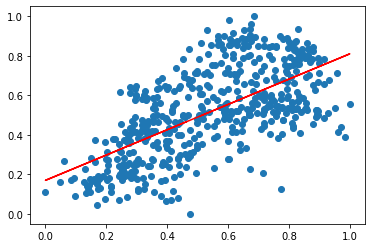

In [63]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.1698 + 0.64*X_train_lm.iloc[:, 1], 'r')
plt.show()

#### Validating with seaborn

<AxesSubplot:xlabel='temp', ylabel='cnt'>

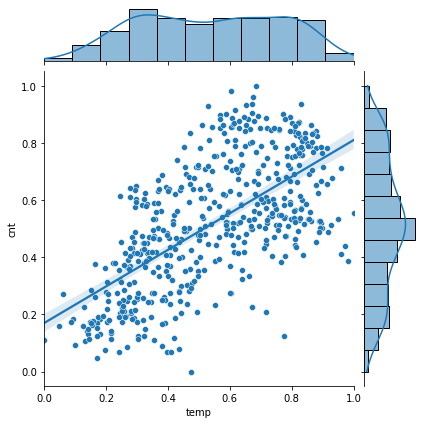

In [62]:
sns.jointplot(X_train['temp'],y_train, scatter = False, kind = 'reg')
sns.scatterplot(X_train['temp'], y_train)

### Feature Selection with RFE

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
X_train.drop(columns=['low','medium','high','very high'], inplace=True)
lm = LinearRegression()
lm.fit(X_train, y_train)
# limit # of features to 15
rfe = RFE(lm, 15) 
rfe = rfe.fit(X_train, y_train) 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 3),
 ('Feb', False, 12),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', False, 14),
 ('May', False, 10),
 ('Nov', False, 2),
 ('Oct', False, 5),
 ('Sep', False, 13),
 ('cloudy', True, 1),
 ('misty', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 8),
 ('Sun', True, 1),
 ('Thurs', False, 11),
 ('Tues', False, 6),
 ('Wed', False, 7)]

In [65]:
rfe_vars=X_train.columns[rfe.support_]
rfe_vars

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'winter', 'Aug', 'Jul', 'Jun', 'cloudy', 'misty', 'Mon', 'Sun'],
      dtype='object')

In [66]:
X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,winter,Aug,Jul,Jun,cloudy,misty,Mon,Sun
653,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1


In [74]:
X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,winter,Aug,Jul,Jun,cloudy,misty,Mon,Sun
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,1


#### Model Training and Summary

In [75]:
lr2 = sm.OLS(y_train, X_train_rfe).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          5.34e-190
Time:                        23:40:13   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2353      0.025      9.348      0.000       0.186       0.285
yr             0.2289      0.008     28.309      0.000       0.213       0.245
holiday       -0.0112      0.021     -0.527      0.599      -0.053       0.031
workingday     0.0923      0.009     10.009      0.000       0.074       0.110
temp           0.5715      0.035     16.495      0.000       0.503       0.640
hum           -0.1675      0.038     -4.397      0.000      -0.242      -0.093
windspeed     -0.1881      0.025     -7.388      0.000      -0.238      -0.138
spring        -0.1063      0.015     -7.189      0.000      -0.135      -0.077
winter         0.0488      0.012      3.952      0.000       0.025       0.073
Aug           -0.0679      0.017     -4.037      0.000      -0.101      -0.035
Jul           -0.1307      0.019     -6.823      0.000      -0.168      -0.093
Jun           -0.0583      0.018     -3.223      0.001      -0.094      -0.023
cloudy        -0.2459      0.026     -9.374      0.000      -0.297      -0.194
misty         -0.0564      0.010     -5.376      0.000      -0.077      -0.036
Mon            0.0495      0.012      4.148      0.000       0.026       0.073
Sun            0.1048      0.011      9.233      0.000       0.082       0.127
==============================================================================
Omnibus:                       65.882   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.270
Skew:                          -0.676   Prob(JB):                     4.29e-35
Kurtosis:                       5.371   Cond. No.                     6.27e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### VIF for LR2

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,40.82
14,Sun,9.95
13,Mon,9.67
3,temp,3.88
1,holiday,2.55
6,spring,2.55
4,hum,1.96
7,winter,1.81
9,Jul,1.64
12,misty,1.57


In [79]:
# Dropping monday to check new VIF for workday
X_train_rfe.drop(columns='Mon', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     192.7
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          5.34e-190
Time:                        23:44:11   Log-Likelihood:                 513.88
No. Observations:                 510   AIC:                            -997.8
Df Residuals:                     495   BIC:                            -934.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2848      0.033      8.724      0.000       0.221       0.349
yr             0.2289      0.008     28.309      0.000       0.213       0.245
holiday       -0.0607      0.027     -2.235      0.026      -0.114      -0.007
workingday     0.0428      0.012      3.675      0.000       0.020       0.066
temp           0.5715      0.035     16.495      0.000       0.503       0.640
hum           -0.1675      0.038     -4.397      0.000      -0.242      -0.093
windspeed     -0.1881      0.025     -7.388      0.000      -0.238      -0.138
spring        -0.1063      0.015     -7.189      0.000      -0.135      -0.077
winter         0.0488      0.012      3.952      0.000       0.025       0.073
Aug           -0.0679      0.017     -4.037      0.000      -0.101      -0.035
Jul           -0.1307      0.019     -6.823      0.000      -0.168      -0.093
Jun           -0.0583      0.018     -3.223      0.001      -0.094      -0.023
cloudy        -0.2459      0.026     -9.374      0.000      -0.297      -0.194
misty         -0.0564      0.010     -5.376      0.000      -0.077      -0.036
Sun            0.0553      0.015      3.775      0.000       0.027       0.084
==============================================================================
Omnibus:                       65.882   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.270
Skew:                          -0.676   Prob(JB):                     4.29e-35
Kurtosis:                       5.371   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,24.67
3,temp,21.91
2,workingday,5.19
5,windspeed,4.18
6,spring,2.62
12,misty,2.24
7,winter,2.16
0,yr,2.07
13,Sun,1.94
9,Jul,1.78


In [81]:
# Dropping hum to check VIF on temp
X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr4 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          4.66e-187
Time:                        23:47:09   Log-Likelihood:                 504.11
No. Observations:                 510   AIC:                            -980.2
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1944      0.026      7.529      0.000       0.144       0.245
yr             0.2331      0.008     28.519      0.000       0.217       0.249
holiday       -0.0572      0.028     -2.070      0.039      -0.112      -0.003
workingday     0.0462      0.012      3.906      0.000       0.023       0.069
temp           0.5266      0.034     15.620      0.000       0.460       0.593
windspeed     -0.1548      0.025     -6.255      0.000      -0.203      -0.106
spring        -0.1104      0.015     -7.347      0.000      -0.140      -0.081
winter         0.0406      0.012      3.261      0.001       0.016       0.065
Aug           -0.0591      0.017     -3.473      0.001      -0.092      -0.026
Jul           -0.1150      0.019     -6.001      0.000      -0.153      -0.077
Jun           -0.0441      0.018     -2.435      0.015      -0.080      -0.009
cloudy        -0.2912      0.025    -11.858      0.000      -0.339      -0.243
misty         -0.0829      0.009     -9.479      0.000      -0.100      -0.066
Sun            0.0601      0.015      4.043      0.000       0.031       0.089
==============================================================================
Omnibus:                       67.485   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.462
Skew:                          -0.689   Prob(JB):                     3.20e-36
Kurtosis:                       5.407   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,9.37
2,workingday,5.00
4,windspeed,4.18
0,yr,2.06
12,Sun,1.91
5,spring,1.90
7,Aug,1.66
8,Jul,1.66
6,winter,1.65
11,misty,1.56


In [83]:
# Dropping hum to check VIF on temp
X_train_rfe.drop(columns='temp', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr5 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     130.9
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          2.82e-145
Time:                        23:51:10   Log-Likelihood:                 402.10
No. Observations:                 510   AIC:                            -778.2
Df Residuals:                     497   BIC:                            -723.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5076      0.020     25.574      0.000       0.469       0.547
yr             0.2468      0.010     24.883      0.000       0.227       0.266
holiday       -0.0424      0.034     -1.259      0.209      -0.109       0.024
workingday     0.0499      0.014      3.457      0.001       0.022       0.078
windspeed     -0.1885      0.030     -6.266      0.000      -0.248      -0.129
spring        -0.2618      0.014    -18.691      0.000      -0.289      -0.234
winter        -0.0350      0.014     -2.503      0.013      -0.062      -0.008
Aug            0.0528      0.019      2.804      0.005       0.016       0.090
Jul            0.0264      0.021      1.279      0.202      -0.014       0.067
Jun            0.0546      0.021      2.635      0.009       0.014       0.095
cloudy        -0.2878      0.030     -9.605      0.000      -0.347      -0.229
misty         -0.0888      0.011     -8.326      0.000      -0.110      -0.068
Sun            0.0559      0.018      3.081      0.002       0.020       0.092
==============================================================================
Omnibus:                       29.489   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.458
Skew:                          -0.335   Prob(JB):                     7.44e-14
Kurtosis:                       4.548   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# Adding temp variable
X_train_rfe['temp']=X_train['temp']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr6 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          4.66e-187
Time:                        23:52:52   Log-Likelihood:                 504.11
No. Observations:                 510   AIC:                            -980.2
Df Residuals:                     496   BIC:                            -920.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1944      0.026      7.529      0.000       0.144       0.245
yr             0.2331      0.008     28.519      0.000       0.217       0.249
holiday       -0.0572      0.028     -2.070      0.039      -0.112      -0.003
workingday     0.0462      0.012      3.906      0.000       0.023       0.069
windspeed     -0.1548      0.025     -6.255      0.000      -0.203      -0.106
spring        -0.1104      0.015     -7.347      0.000      -0.140      -0.081
winter         0.0406      0.012      3.261      0.001       0.016       0.065
Aug           -0.0591      0.017     -3.473      0.001      -0.092      -0.026
Jul           -0.1150      0.019     -6.001      0.000      -0.153      -0.077
Jun           -0.0441      0.018     -2.435      0.015      -0.080      -0.009
cloudy        -0.2912      0.025    -11.858      0.000      -0.339      -0.243
misty         -0.0829      0.009     -9.479      0.000      -0.100      -0.066
Sun            0.0601      0.015      4.043      0.000       0.031       0.089
temp           0.5266      0.034     15.620      0.000       0.460       0.593
==============================================================================
Omnibus:                       67.485   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.462
Skew:                          -0.689   Prob(JB):                     3.20e-36
Kurtosis:                       5.407   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,9.37
2,workingday,5.00
3,windspeed,4.18
0,yr,2.06
11,Sun,1.91
4,spring,1.90
6,Aug,1.66
7,Jul,1.66
5,winter,1.65
10,misty,1.56


In [88]:
# Dropping workingday to check VIF on temp
X_train_rfe.drop(columns='workingday', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr7 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.0
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          5.61e-185
Time:                        23:56:02   Log-Likelihood:                 496.38
No. Observations:                 510   AIC:                            -966.8
Df Residuals:                     497   BIC:                            -911.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2317      0.024      9.521      0.000       0.184       0.279
yr             0.2334      0.008     28.147      0.000       0.217       0.250
holiday       -0.0946      0.026     -3.599      0.000      -0.146      -0.043
windspeed     -0.1560      0.025     -6.215      0.000      -0.205      -0.107
spring        -0.1111      0.015     -7.289      0.000      -0.141      -0.081
winter         0.0383      0.013      3.036      0.003       0.014       0.063
Aug           -0.0588      0.017     -3.408      0.001      -0.093      -0.025
Jul           -0.1181      0.019     -6.081      0.000      -0.156      -0.080
Jun           -0.0459      0.018     -2.500      0.013      -0.082      -0.010
cloudy        -0.2864      0.025    -11.511      0.000      -0.335      -0.237
misty         -0.0812      0.009     -9.160      0.000      -0.099      -0.064
Sun            0.0221      0.011      1.939      0.053      -0.000       0.045
temp           0.5292      0.034     15.480      0.000       0.462       0.596
==============================================================================
Omnibus:                       65.675   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.676
Skew:                          -0.710   Prob(JB):                     1.72e-31
Kurtosis:                       5.156   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,6.79
2,windspeed,4.08
0,yr,2.06
3,spring,1.69
5,Aug,1.65
6,Jul,1.64
4,winter,1.58
9,misty,1.54
7,Jun,1.48
10,Sun,1.19


In [90]:
# Dropping Sun to check VIF on temp
X_train_rfe.drop(columns='Sun', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr8 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.36e-185
Time:                        00:13:23   Log-Likelihood:                 494.46
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     498   BIC:                            -914.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.024      9.686      0.000       0.188       0.283
yr             0.2329      0.008     28.025      0.000       0.217       0.249
holiday       -0.0982      0.026     -3.732      0.000      -0.150      -0.046
windspeed     -0.1537      0.025     -6.113      0.000      -0.203      -0.104
spring        -0.1110      0.015     -7.262      0.000      -0.141      -0.081
winter         0.0388      0.013      3.075      0.002       0.014       0.064
Aug           -0.0572      0.017     -3.313      0.001      -0.091      -0.023
Jul           -0.1166      0.019     -5.993      0.000      -0.155      -0.078
Jun           -0.0447      0.018     -2.425      0.016      -0.081      -0.008
cloudy        -0.2857      0.025    -11.453      0.000      -0.335      -0.237
misty         -0.0810      0.009     -9.114      0.000      -0.098      -0.064
temp           0.5264      0.034     15.371      0.000       0.459       0.594
==============================================================================
Omnibus:                       58.655   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.626
Skew:                          -0.622   Prob(JB):                     9.63e-30
Kurtosis:                       5.177   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.77
2,windspeed,4.05
0,yr,2.06
3,spring,1.68
5,Aug,1.65
6,Jul,1.64
4,winter,1.57
9,misty,1.53
7,Jun,1.48
8,cloudy,1.08


In [92]:
# Dropping temp to check VIF on temp
X_train_rfe.drop(columns='temp', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr9 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          1.15e-144
Time:                        00:15:01   Log-Likelihood:                 395.45
No. Observations:                 510   AIC:                            -768.9
Df Residuals:                     499   BIC:                            -722.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5510      0.016     34.837      0.000       0.520       0.582
yr             0.2467      0.010     24.622      0.000       0.227       0.266
holiday       -0.0852      0.032     -2.670      0.008      -0.148      -0.023
windspeed     -0.1883      0.030     -6.200      0.000      -0.248      -0.129
spring        -0.2627      0.014    -18.577      0.000      -0.291      -0.235
winter        -0.0372      0.014     -2.640      0.009      -0.065      -0.010
Aug            0.0543      0.019      2.856      0.004       0.017       0.092
Jul            0.0243      0.021      1.166      0.244      -0.017       0.065
Jun            0.0537      0.021      2.564      0.011       0.013       0.095
cloudy        -0.2821      0.030     -9.325      0.000      -0.342      -0.223
misty         -0.0868      0.011     -8.059      0.000      -0.108      -0.066
==============================================================================
Omnibus:                       27.105   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.071
Skew:                          -0.307   Prob(JB):                     1.10e-12
Kurtosis:                       4.489   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# Adding temp variable
X_train_rfe['temp']=X_train['temp']

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr10 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.36e-185
Time:                        00:16:13   Log-Likelihood:                 494.46
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     498   BIC:                            -914.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.024      9.686      0.000       0.188       0.283
yr             0.2329      0.008     28.025      0.000       0.217       0.249
holiday       -0.0982      0.026     -3.732      0.000      -0.150      -0.046
windspeed     -0.1537      0.025     -6.113      0.000      -0.203      -0.104
spring        -0.1110      0.015     -7.262      0.000      -0.141      -0.081
winter         0.0388      0.013      3.075      0.002       0.014       0.064
Aug           -0.0572      0.017     -3.313      0.001      -0.091      -0.023
Jul           -0.1166      0.019     -5.993      0.000      -0.155      -0.078
Jun           -0.0447      0.018     -2.425      0.016      -0.081      -0.008
cloudy        -0.2857      0.025    -11.453      0.000      -0.335      -0.237
misty         -0.0810      0.009     -9.114      0.000      -0.098      -0.064
temp           0.5264      0.034     15.371      0.000       0.459       0.594
==============================================================================
Omnibus:                       58.655   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.626
Skew:                          -0.622   Prob(JB):                     9.63e-30
Kurtosis:                       5.177   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1) 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,6.77
2,windspeed,4.05
0,yr,2.06
3,spring,1.68
5,Aug,1.65
6,Jul,1.64
4,winter,1.57
9,misty,1.53
7,Jun,1.48
8,cloudy,1.08


In [96]:
# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr11 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.36e-185
Time:                        00:18:52   Log-Likelihood:                 494.46
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     498   BIC:                            -914.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.024      9.686      0.000       0.188       0.283
yr             0.2329      0.008     28.025      0.000       0.217       0.249
holiday       -0.0982      0.026     -3.732      0.000      -0.150      -0.046
windspeed     -0.1537      0.025     -6.113      0.000      -0.203      -0.104
spring        -0.1110      0.015     -7.262      0.000      -0.141      -0.081
winter         0.0388      0.013      3.075      0.002       0.014       0.064
Aug           -0.0572      0.017     -3.313      0.001      -0.091      -0.023
Jul           -0.1166      0.019     -5.993      0.000      -0.155      -0.078
Jun           -0.0447      0.018     -2.425      0.016      -0.081      -0.008
cloudy        -0.2857      0.025    -11.453      0.000      -0.335      -0.237
misty         -0.0810      0.009     -9.114      0.000      -0.098      -0.064
temp           0.5264      0.034     15.371      0.000       0.459       0.594
==============================================================================
Omnibus:                       58.655   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.626
Skew:                          -0.622   Prob(JB):                     9.63e-30
Kurtosis:                       5.177   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Residual Analysis

In [98]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'winter', 'Aug', 'Jul',
       'Jun', 'cloudy', 'misty', 'temp'],
      dtype='object')

In [99]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [100]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

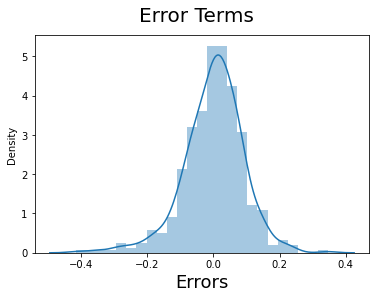

In [101]:
# Histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  

### LR Assumption Validation

#### 1. Linear relationship between independant variables aand target

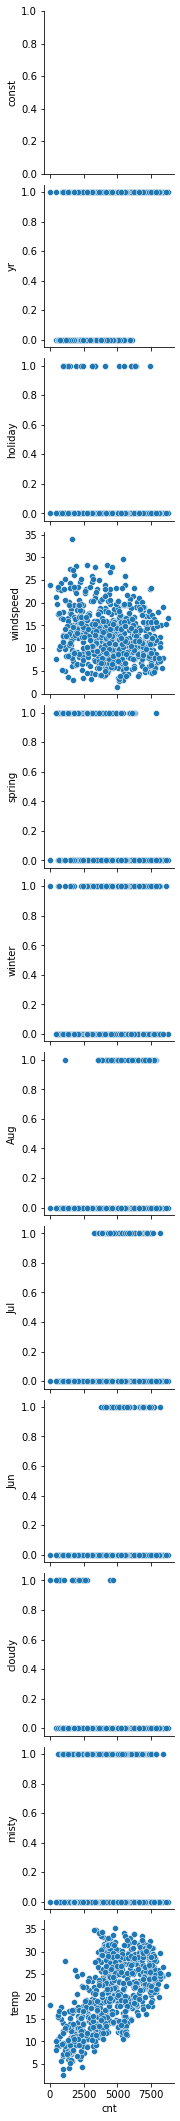

<Figure size 1440x1080 with 0 Axes>

In [103]:
sns.pairplot(bike_df, y_vars=X_train_rfe.columns, x_vars='cnt')
plt.figure(figsize = (20, 15))
plt.show()

#### 2. Autocorrelation in Residuals with Durbin Watson Test
0 < DW < 2 : positive autocorrelation
2 < DW < 4 : negative autocorrelation

In [105]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.4
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.36e-185
Time:                        00:45:15   Log-Likelihood:                 494.46
No. Observations:                 510   AIC:                            -964.9
Df Residuals:                     498   BIC:                            -914.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2355      0.024      9.686      0.000       0.188       0.283
yr             0.2329      0.008     28.025      0.000       0.217       0.249
holiday       -0.0982      0.026     -3.732      0.000      -0.150      -0.046
windspeed     -0.1537      0.025     -6.113      0.000      -0.203      -0.104
spring        -0.1110      0.015     -7.262      0.000      -0.141      -0.081
winter         0.0388      0.013      3.075      0.002       0.014       0.064
Aug           -0.0572      0.017     -3.313      0.001      -0.091      -0.023
Jul           -0.1166      0.019     -5.993      0.000      -0.155      -0.078
Jun           -0.0447      0.018     -2.425      0.016      -0.081      -0.008
cloudy        -0.2857      0.025    -11.453      0.000      -0.335      -0.237
misty         -0.0810      0.009     -9.114      0.000      -0.098      -0.064
temp           0.5264      0.034     15.371      0.000       0.459       0.594
==============================================================================
Omnibus:                       58.655   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.626
Skew:                          -0.622   Prob(JB):                     9.63e-30
Kurtosis:                       5.177   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3. Heteroskedasticity

Text(0, 0.5, 'Residuals')

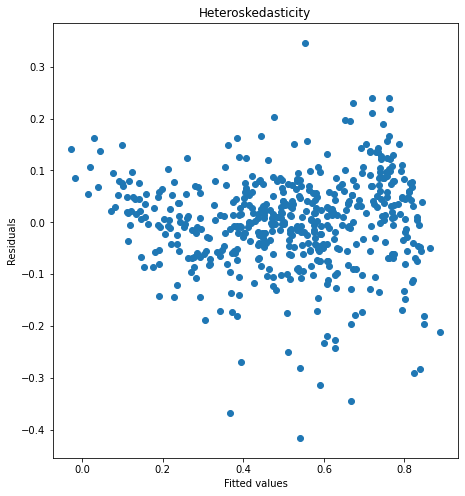

In [123]:
plt.subplots(figsize=(16,8))
plt.subplot(1,2,1)
plt.title("Heteroskedasticity")
plt.scatter(y_train_pred, (y_train-y_train_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

#### 4. Multicollinearity

In [108]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,34.97
11,temp,3.53
4,spring,2.54
5,winter,1.77
7,Jul,1.58
6,Aug,1.53
8,Jun,1.38
3,windspeed,1.08
9,cloudy,1.05
10,misty,1.05


#### 5. Normality of Residuals

Text(0.5, 0, 'Errors')

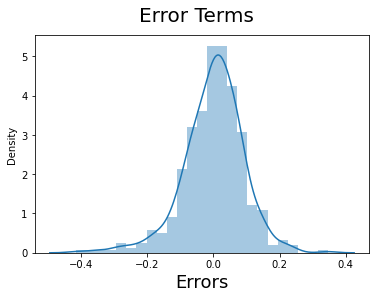

In [109]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

### Predictions

In [110]:
scaled

['temp', 'hum', 'windspeed', 'cnt']

In [111]:
bike_df_test[scaled]=scaler.fit_transform(bike_df_test[scaled])

In [112]:
bike_df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,cloudy,misty,Mon,Sat,Sun,Thurs,Tues,Wed,low,medium,high,very high
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.508750,0.418870,0.516216,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.027397,0.319635,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.200913,0.205479,0.228311,0.182648
std,0.500722,0.188034,0.459904,0.249189,0.201253,0.188111,0.238702,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.163612,0.467403,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.401601,0.404977,0.420705,0.387263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
y_test = bike_df_test.pop('cnt')
X_test = bike_df_test[:]

In [115]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'windspeed', 'spring', 'winter', 'Aug', 'Jul',
       'Jun', 'cloudy', 'misty', 'temp'],
      dtype='object')

In [116]:
X_train_rfe.drop(columns='const', inplace=True)

In [117]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [118]:
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

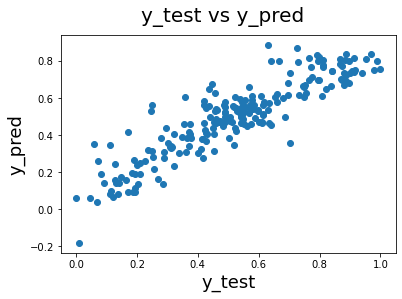

In [119]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18) 

In [120]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.00842179966949908
0.011660137829903475


In [121]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8327113497069095
0.7944203414474871


### Feature Importance

In [139]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [140]:
model = RandomForestRegressor(n_estimators=300, random_state=0,max_depth=6)
#X_train_rfe_rm = X_train_rfe.drop('const', axis =1,inplace = True)
X_train_rfe.columns
model.fit(X_train_rfe,y_train)

RandomForestRegressor(max_depth=6, n_estimators=300, random_state=0)

Text(0.5, 0, 'Feature Importance')

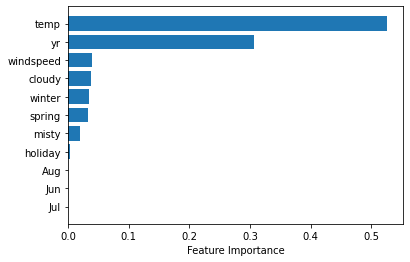

In [142]:
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train_rfe.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")